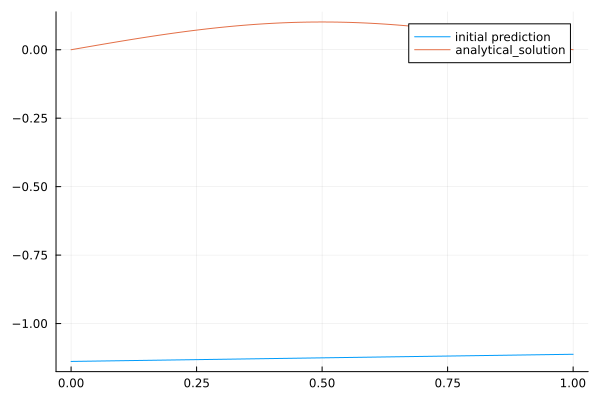

In [1]:
using Optimisers, Zygote, Plots, Random, Distributions,TaylorDiff

SEED = 42
N_collocation_points = 100
HIDDEN_DEPTH = 100
LEARNING_RATE = 1e-3
N_EPOCHS = 20_000
BC_LOSS_WEIGHT = 100.0

rhs_function(x) = sin.(π * x)
analytical_solution(x) = sin(π * x) / π^2

rng = MersenneTwister(SEED)

sigmoid(x) = 1.0 / (1.0 + exp(-x))

# Initialize the weights according to the Xavier Glorot initializer
uniform_limit = sqrt(6 / (1 + HIDDEN_DEPTH))
W = rand(
    rng,
    Uniform(-uniform_limit, +uniform_limit),
    HIDDEN_DEPTH,
    1,
)
V = rand(
    rng,
    Uniform(-uniform_limit, +uniform_limit),
    1,
    HIDDEN_DEPTH,
)
b = zeros(HIDDEN_DEPTH)

parameters = (; W, V, b)

network_forward(x, p) = p.V * sigmoid.(p.W * x .+ p.b)

x_line = reshape(collect(range(0.0f0, stop=1.0f0, length=100)), (1, 100))

# Plot initial prediction of the network (together with the analytical solution)
plot(x_line[:], network_forward(x_line, parameters)[:], label="initial prediction")
plot!(x_line[:], analytical_solution.(x_line[:]), label="analytical_solution")

In [2]:
analytical_solution.(x_line[:])

100-element Vector{Float64}:
  0.0
  0.0032147116646386456
  0.006426187065925592
  0.00963119145031243
  0.0128264976132672
  0.016008888163979326
  0.019175161564572774
  0.022322124581089602
  0.025446611156031092
  0.028545479388751155
  ⋮
  0.02544661417563767
  0.02232212609089289
  0.019175160054769484
  0.016008886654176036
  0.012826494593660621
  0.009631162764049924
  0.006426181026712433
  0.003214704493073019
 -8.857779199724213e-9

In [3]:
derivative = TaylorDiff.derivative.(analytical_solution, x_line[:], Float32.(ones(size(x_line[:]))), Val(2))


100-element Vector{Float64}:
  0.0
 -0.03172793335120145
 -0.06342393134321693
 -0.09505605559725387
 -0.12659246436193028
 -0.15800140949366812
 -0.1892512696723657
 -0.22031054436218447
 -0.25114799875266497
 -0.2817326033665951
  ⋮
 -0.2511480470663703
 -0.22031056851903713
 -0.18925124551551306
 -0.1580013853368155
 -0.12659244020507765
 -0.0950557717542354
 -0.06342386491187217
 -0.03172786390025012
  8.742278476288767e-8